<a href="https://colab.research.google.com/github/whistle-hikhi/K-Means-clustering/blob/main/kmeans_object_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Mar 27 07:42:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%load_ext cuml.accel

[2025-03-27 07:42:18.279] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-03-27 07:42:49.773] [CUML] [info] cuML: Installed accelerator for umap.
[2025-03-27 07:42:49.885] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-03-27 07:42:49.885] [CUML] [info] cuML: Successfully initialized accelerator.


In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

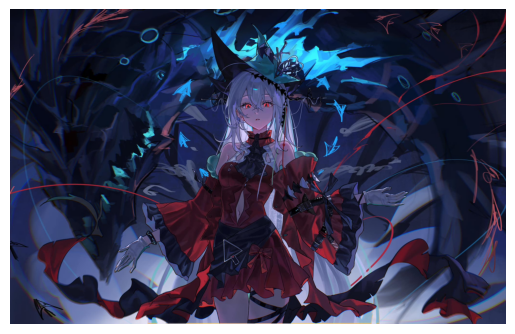

In [4]:
img = mpimg.imread('/content/476075174_1819078258828393_5354076271125935197_n.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

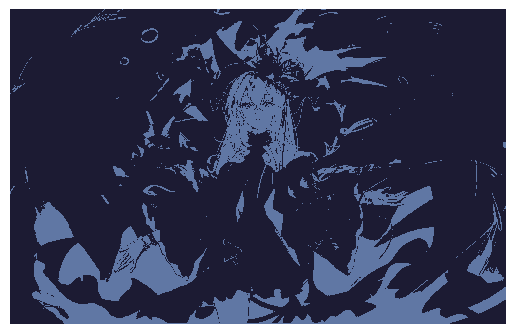

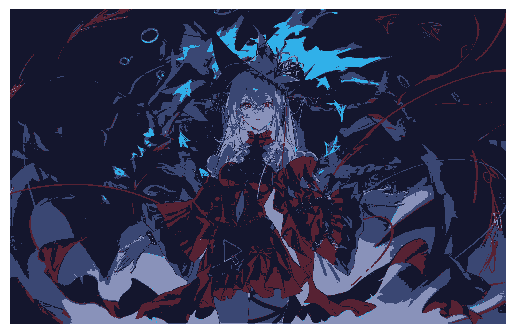

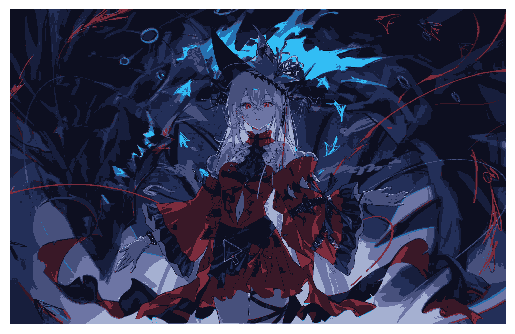

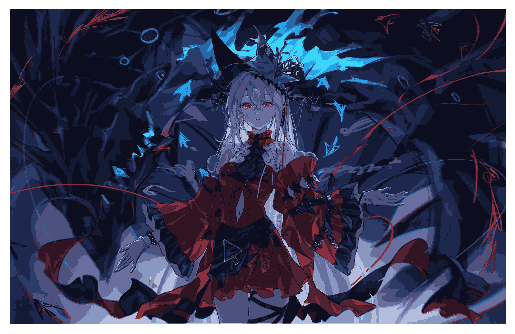

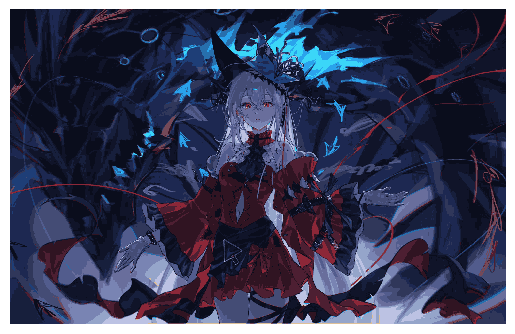

In [6]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

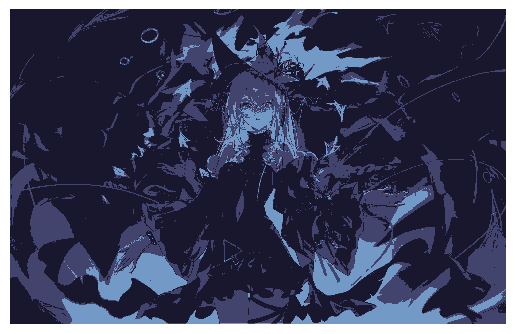

In [7]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and prepare the image
def load_image(image_path):
    image = cv2.imread(image_path)
    # Convert BGR to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# Apply K-means clustering
def apply_kmeans(image, n_clusters=3):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Convert to float32 for K-means
    pixels = np.float32(pixels)

    # Apply K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pixels)

    # Get cluster centers (colors)
    centers = np.uint8(kmeans.cluster_centers_)

    # Create segmented image
    segmented_image = centers[labels]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image, labels, centers

# Basic object segmentation using contours
def segment_objects(image, clustered_image):
    # Convert to grayscale for contour detection
    gray = cv2.cvtColor(clustered_image, cv2.COLOR_RGB2GRAY)

    # Apply threshold
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image for drawing
    result = image.copy()

    # Draw contours and bounding boxes
    for contour in contours:
        # Get bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)
        # Draw rectangle around detected objects
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return result, contours



In [10]:
# Main execution
def main():
    # Replace with your image path
    image_path = "/content/476075174_1819078258828393_5354076271125935197_n.jpg"

    # Load image
    original_image = load_image(image_path)

    # Apply K-means clustering
    clustered_image, labels, centers = apply_kmeans(original_image, n_clusters=3)

    # Segment objects
    segmented_image, contours = segment_objects(original_image, clustered_image)

    # Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(clustered_image)
    plt.title('K-means Clustered')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(segmented_image)
    plt.title('Segmented Objects')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Number of detected objects: {len(contours)}")
    print(f"Cluster centers (RGB): \n{centers}")

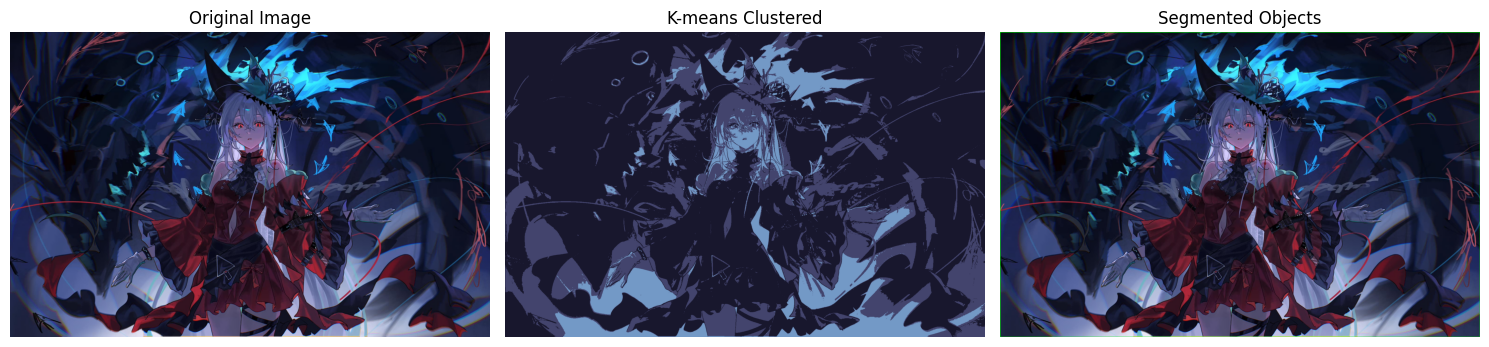

Number of detected objects: 1
Cluster centers (RGB): 
[[115 153 198]
 [ 67  68 109]
 [ 24  23  45]]


In [11]:
main()